<a href="https://colab.research.google.com/github/DaveStutler/G9/blob/master/TEAM_FRIENDSHIP_PARTICLES_WOOOOO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install uproot awkward
!pip install pandas


!pip install lumin uproot
!git clone https://github.com/SauceCat/PDPbox.git && cd PDPbox && pip install -e .

  Using cached matplotlib-3.2.2-cp310-cp310-linux_x86_64.whl
INFO: pip is looking at multiple versions of pdpbox to determine which version is compatible with other requirements. This could take a while.
  Using cached PDPbox-0.2.1.tar.gz (34.0 MB)
  Preparing metadata (setup.py) ... done
  Using cached PDPbox-0.2.0-py3-none-any.whl
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.2
    Uninstalling matplotlib-3.7.2:
      Successfully uninstalled matplotlib-3.7.2
  Attempting uninstall: pdpbox
    Found existing installation: PDPbox 0.3.0
    Uninstalling PDPbox-0.3.0:
      Successfully uninstalled PDPbox-0.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.12 requires fastcore<1.6,>=1.5.29, but you have fastcore 1.3.5 which is incompatible.
fastai 2.7.12 requires fastprogress>=0.2.4, but you have fastprogress 0.1

fatal: destination path 'PDPbox' already exists and is not an empty directory.


#Installs

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## Data Exploration

#All plots from linear

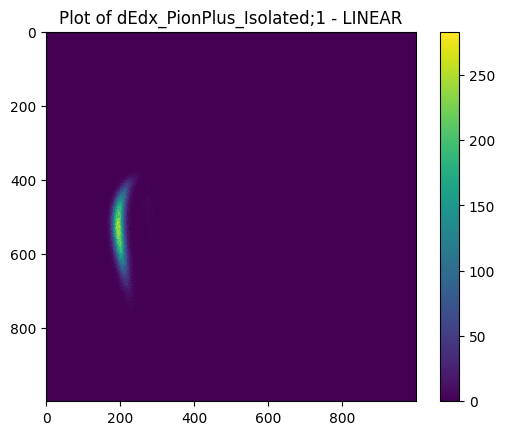

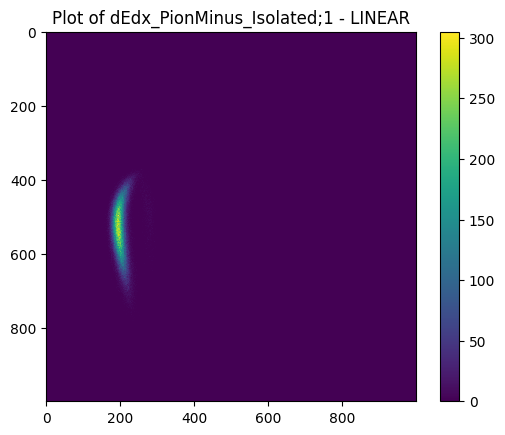

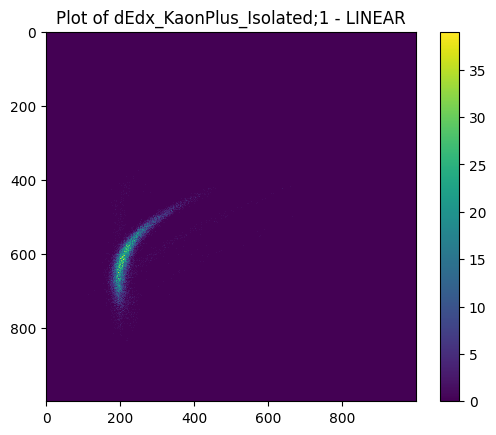

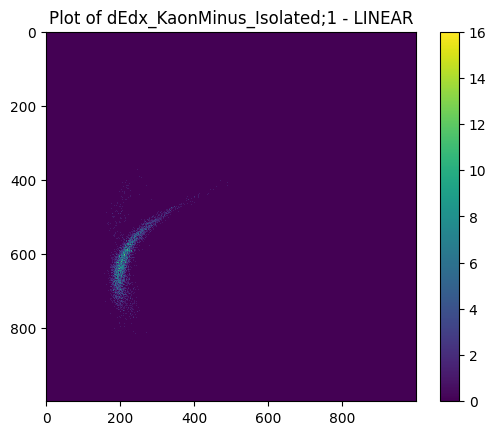

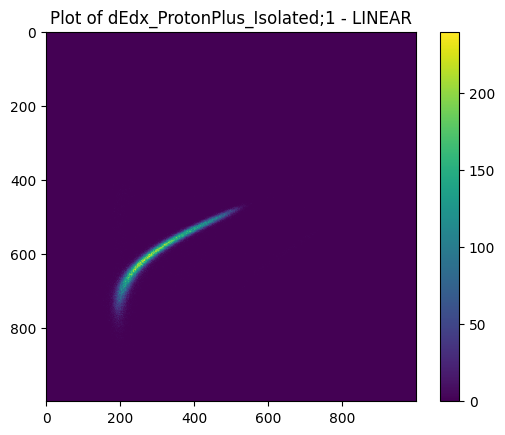

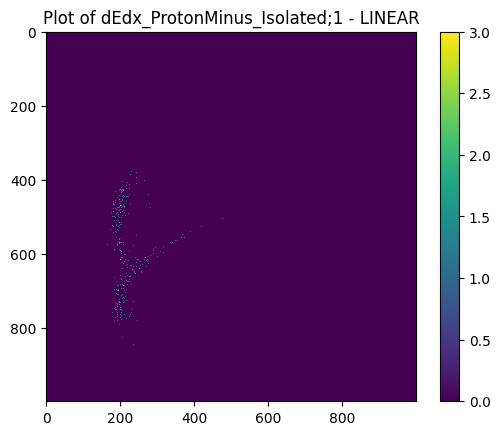

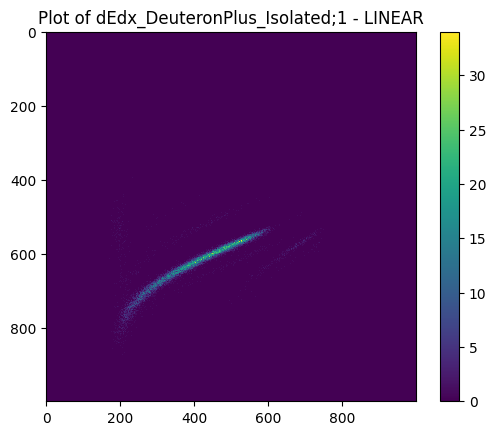

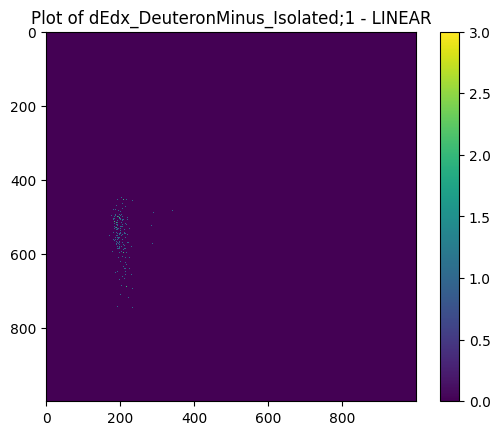

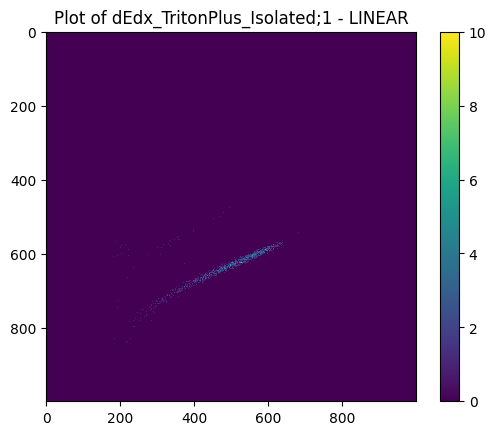

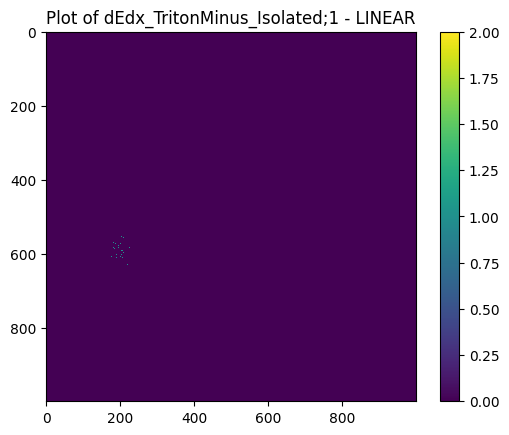

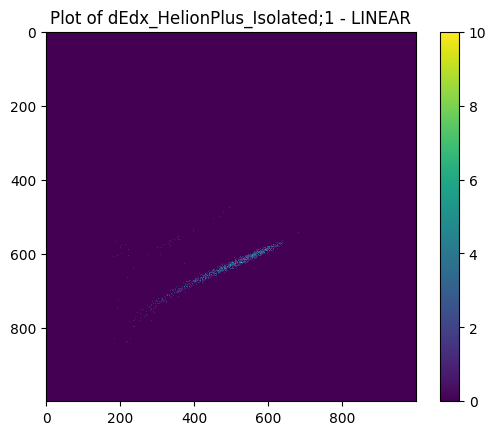

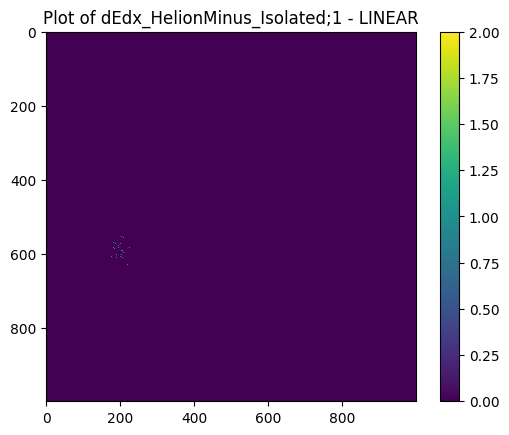

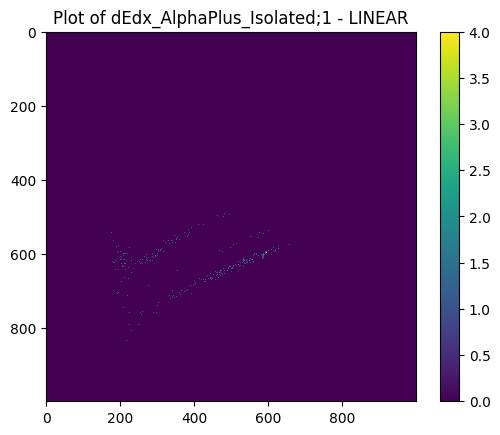

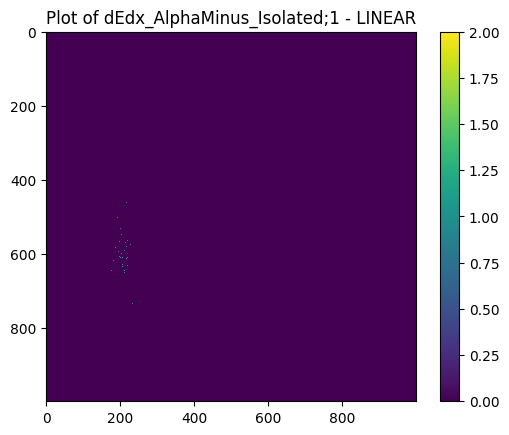

In [ ]:
import uproot
import pandas as pd
import numpy
import matplotlib.pyplot as plt

root_file = uproot.open("/home/Output_File_2023_02_15.root")
tree_names = ['dEdx_PionPlus_Isolated;1', 'dEdx_PionMinus_Isolated;1', 'dEdx_KaonPlus_Isolated;1',
'dEdx_KaonMinus_Isolated;1',
'dEdx_ProtonPlus_Isolated;1',
'dEdx_ProtonMinus_Isolated;1',
'dEdx_DeuteronPlus_Isolated;1',
'dEdx_DeuteronMinus_Isolated;1',
'dEdx_TritonPlus_Isolated;1',
'dEdx_TritonMinus_Isolated;1',
'dEdx_HelionPlus_Isolated;1',
'dEdx_HelionMinus_Isolated;1',
'dEdx_AlphaPlus_Isolated;1',
'dEdx_AlphaMinus_Isolated;1']


mydict = {}


for tree_name in tree_names:
    mydict[tree_name] = [root_file[tree_name].values()]
    plt.imshow(mydict[tree_name][0], cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title(f"Plot of {tree_name} - LINEAR")
    plt.show()
output_df = pd.DataFrame(mydict)
# so we can compare spherical vs linear... 0 = LINEAR
output_df['collision type'] = 0

#All plots from circlar

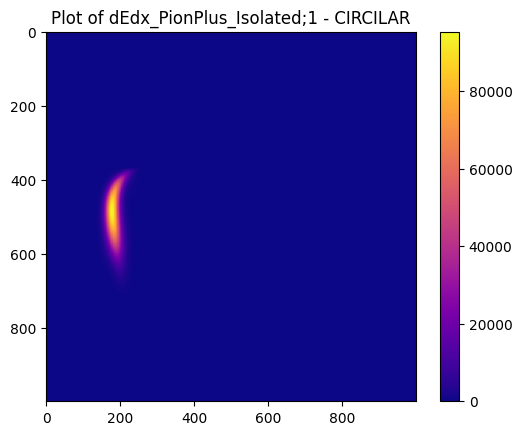

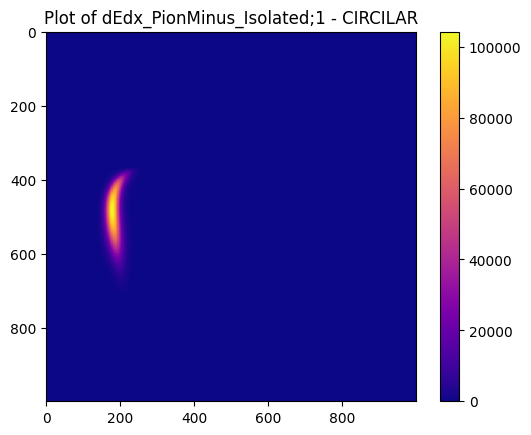

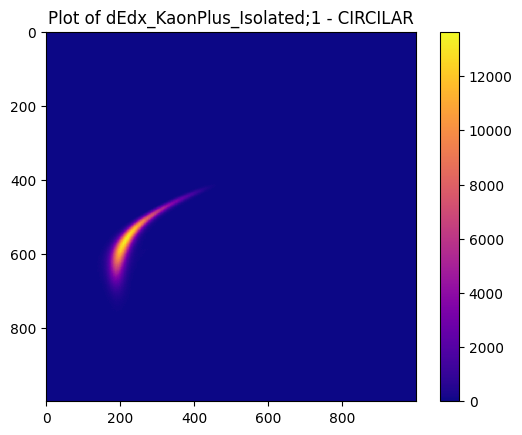

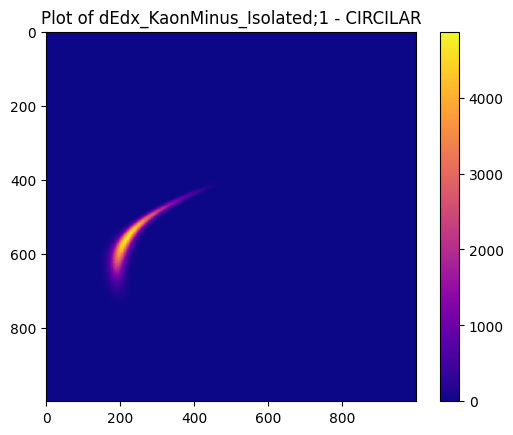

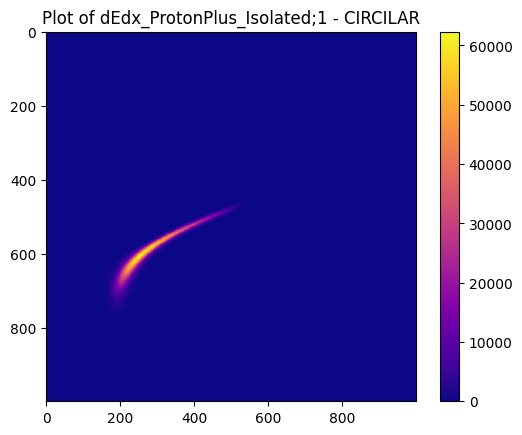

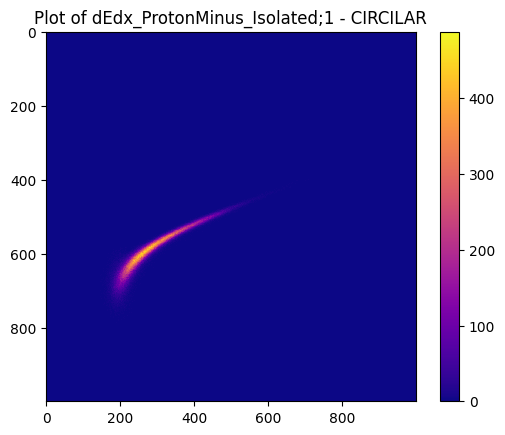

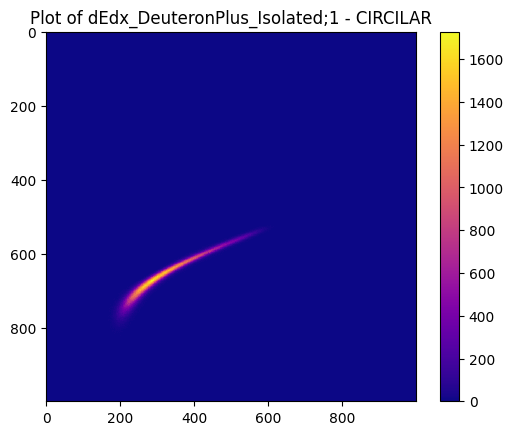

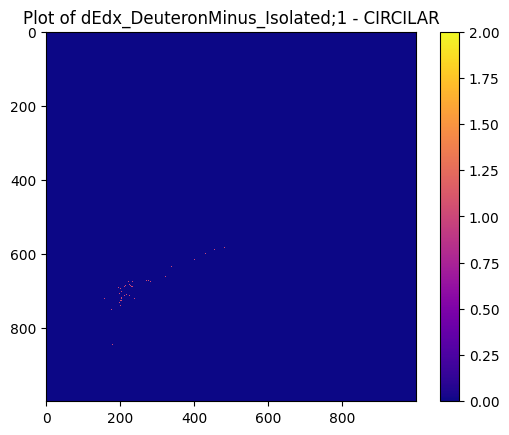

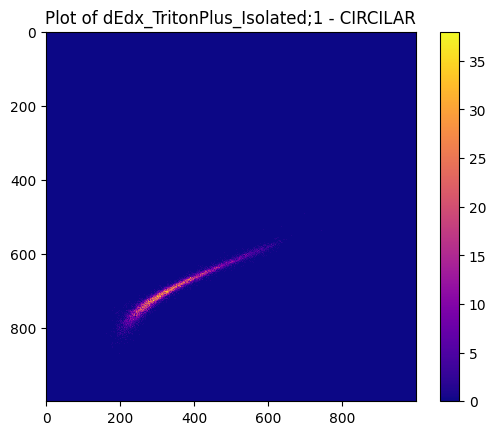

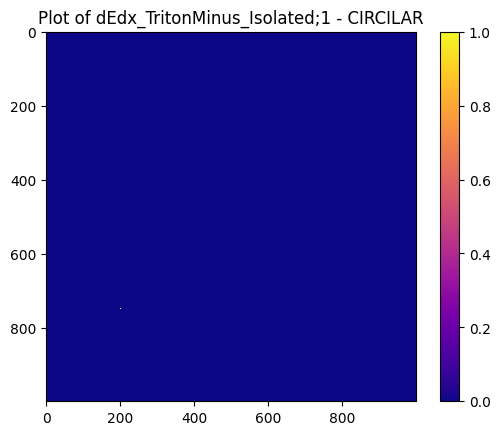

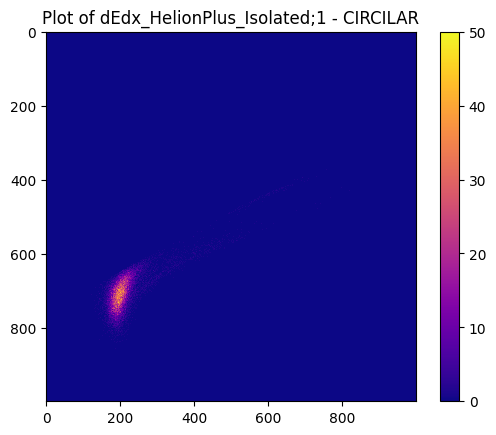

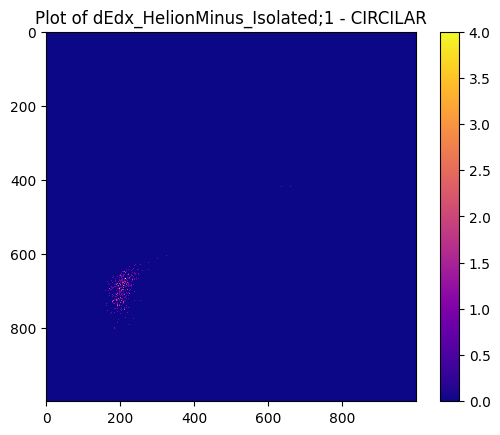

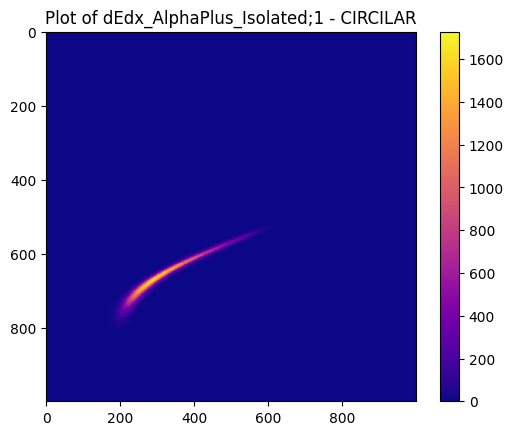

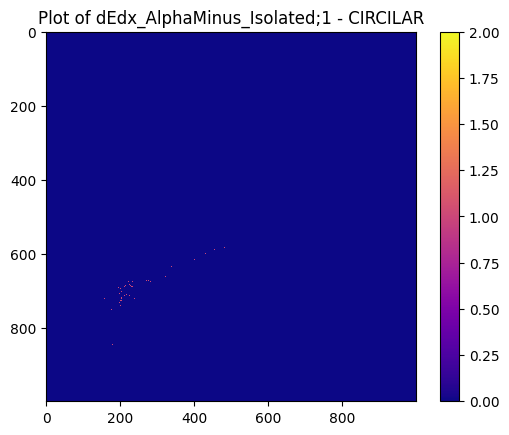

,dEdx_PionPlus_Isolated;1,dEdx_PionMinus_Isolated;1,dEdx_KaonPlus_Isolated;1,dEdx_KaonMinus_Isolated;1,dEdx_ProtonPlus_Isolated;1,dEdx_ProtonMinus_Isolated;1,dEdx_DeuteronPlus_Isolated;1,dEdx_DeuteronMinus_Isolated;1,dEdx_TritonPlus_Isolated;1,dEdx_TritonMinus_Isolated;1,dEdx_HelionPlus_Isolated;1,dEdx_HelionMinus_Isolated;1,dEdx_AlphaPlus_Isolated;1,dEdx_AlphaMinus_Isolated;1,collision type
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1


In [ ]:
import uproot
import pandas as pd
import numpy
import matplotlib.pyplot as plt

root_file = uproot.open("/home/yieldHistos_7p7GeV_Pion_2022_08_31.root")

# NOTE to future us:
#   the tree-names below are actually from the other file,
#   extract the names column from this file before finishing

tree_names = ['dEdx_PionPlus_Isolated;1', 'dEdx_PionMinus_Isolated;1', 'dEdx_KaonPlus_Isolated;1',
'dEdx_KaonMinus_Isolated;1',
'dEdx_ProtonPlus_Isolated;1',
'dEdx_ProtonMinus_Isolated;1',
'dEdx_DeuteronPlus_Isolated;1',
'dEdx_DeuteronMinus_Isolated;1',
'dEdx_TritonPlus_Isolated;1',
'dEdx_TritonMinus_Isolated;1',
'dEdx_HelionPlus_Isolated;1',
'dEdx_HelionMinus_Isolated;1',
'dEdx_AlphaPlus_Isolated;1',
'dEdx_AlphaMinus_Isolated;1']


mydict = {}



for tree_name in tree_names:
    mydict[tree_name] = [root_file[tree_name].values()]
    plt.imshow(mydict[tree_name][0], cmap='plasma', interpolation='nearest')
    plt.colorbar()
    plt.title(f"Plot of {tree_name} - CIRCILAR")
    plt.show()
yeild_df = pd.DataFrame(mydict)
# so we can compare spherical vs linear. 1 = CIRCILAR
yeild_df['collision type'] = 1
yeild_df

In [ ]:
combined_df = pd.concat([output_df, yeild_df], ignore_index=True)

combined_df

,dEdx_PionPlus_Isolated;1,dEdx_PionMinus_Isolated;1,dEdx_KaonPlus_Isolated;1,dEdx_KaonMinus_Isolated;1,dEdx_ProtonPlus_Isolated;1,dEdx_ProtonMinus_Isolated;1,dEdx_DeuteronPlus_Isolated;1,dEdx_DeuteronMinus_Isolated;1,dEdx_TritonPlus_Isolated;1,dEdx_TritonMinus_Isolated;1,dEdx_HelionPlus_Isolated;1,dEdx_HelionMinus_Isolated;1,dEdx_AlphaPlus_Isolated;1,dEdx_AlphaMinus_Isolated;1,collision type
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
